In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
data_train_path = "C:/Users/iaade/PycharmProjects/Animla classiications/Fruits_Vegetables/train"
data_test_path = "C:/Users/iaade/PycharmProjects/Animla classiications/Fruits_Vegetables/test"
data_val_path = "C:/Users/iaade/PycharmProjects/Animla classiications/Fruits_Vegetables/validation"
image_width = 180
image_height = 180
#bring data set in form of arrays
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle = True,
    image_size = (image_width, image_height),
    batch_size = 32, validation_split = False)



Found 3115 files belonging to 36 classes.


In [6]:
data_train.class_names


['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [17]:
data_cat = data_train.class_names
data_cat

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [39]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
image_size = (image_width , image_height),
batch_size = 32, shuffle = False,validation_split = False)

Found 351 files belonging to 36 classes.


In [43]:
data_test = tf.keras.utils.image_dataset_from_directory(data_test_path,
image_size = (image_width , image_height),
batch_size = 32, shuffle = False,validation_split = False)


Found 359 files belonging to 36 classes.


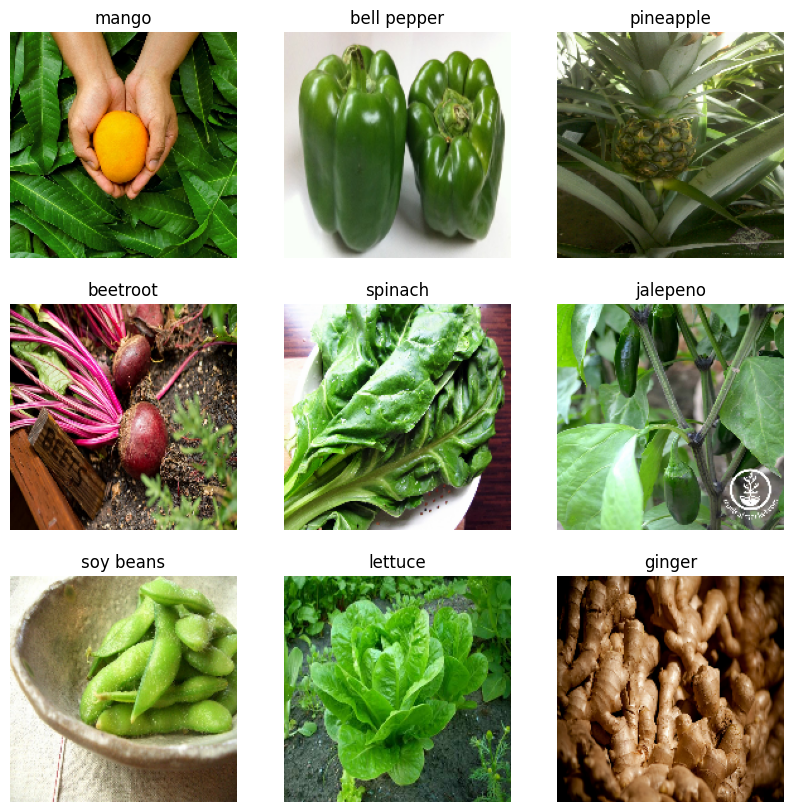

In [19]:
#print image from validation dataset
plt.figure(figsize=(10,10)) 
for image,labels in data_train.take(1):
    
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype("uint8"))
        plt.title(data_cat[labels[i]])
        plt.axis("off")

In [44]:
from tensorflow.keras.models import Sequential

In [45]:
data_train


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [46]:
#create a model( we will build a sequential model and also we are normalizing the picture which is image preprocessing)
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16,3,padding = 'same',activation = "relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding = "same", activation = "relu"),
    layers.MaxPool2D(),
    layers.Conv2D(64,3, padding = "same", activation = "relu"),
    layers.MaxPool2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))

])

In [47]:
model.compile(optimizer = "adam", loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics = ["accuracy"])


In [ ]:
epochs_size = 25


In [64]:
history = model.fit( data_train,  validation_data = data_val, epochs = epochs_size )

Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 19s 178ms/step - accuracy: 0.9890 - loss: 0.0351 - val_accuracy: 0.9601 - val_loss: 0.3877
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 19s 195ms/step - accuracy: 0.9892 - loss: 0.0310 - val_accuracy: 0.9573 - val_loss: 0.3956
Epoch 3/25
83/98 ━━━━━━━━━━━━━━━━━━━━ 2s 193ms/step - accuracy: 0.9884 - loss: 0.0368

KeyboardInterrupt: 

Text(0.5, 1.0, 'Loss')

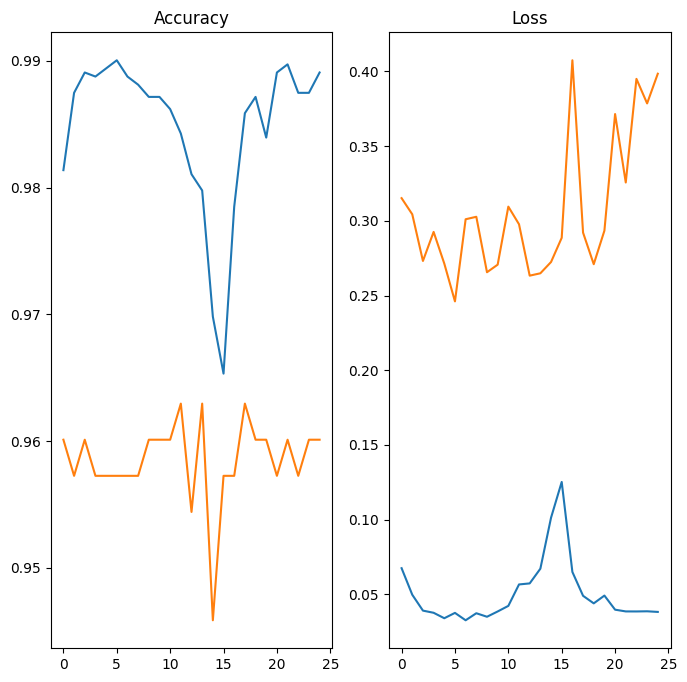

In [68]:
#let us check to compare the accuracy btw val dataset and train dataset
epochs_range = range(epochs_size)
plt.figure(figsize =(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, history.history["accuracy"],label = "Training Accuracy")
plt.plot(epochs_range, history.history["val_accuracy"],label = "Validation Accuracy")
plt.title("Accuracy")

plt.subplot(1,2,2)
plt.plot(epochs_range, history.history["loss"],label = "Training Loss")
plt.plot(epochs_range, history.history["val_loss"],label = "Validation Loss")
plt.title("Loss")

In [112]:
#we add the dowloaded fruit into the variable , we can change it to banana, or any fruit or vegetables
image = "banana.jpg"
image = tf.keras.utils.load_img(image,target_size =(image_width,image_height))
img_arr  = tf.keras.utils.array_to_img(image)
img_bat = tf.expand_dims(img_arr,0)

In [113]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


In [114]:
score = tf.nn.softmax(predict)


In [115]:
print("Veg/Fruit in image is {} with accuracy of {:0.2f}".format(data_cat[np.argmax(score)], np.max(score)*100))


Veg/Fruit in image is banana with accuracy of 69.51


In [116]:
model.save("Image_classify.keras")

In [ ]:
# I want to build a web application 
#I will got to visual studio